# 1. Setup

In [2]:
#!pip install kagglehub
import numpy as np
import pandas as pd
import linear_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#import kagglehub

# 2. Importing Insurance Data
Here, we're using a basic insurance dataset where we use age, sex, BMI, number of children, status as a smoker, and region to try to predict how much individuals get charged for health insurance. In theory, all of these should collectively very easily predict how much insurance costs for each of these people. 

In [4]:
csv_path = 'insurance.csv'  # Path to the insurance.csv file
df = pd.read_csv(csv_path)

df.head()
#print(df.dtypes)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here, we process the columns by taking numerical variables and standardizing them. In addition, the categorical variables are treated either as binary in the case of sex and smoker status. If we look at the regions, we treat it as a categorical variables in the same way it is usually done, with there being $n-1$ columns to represent $n$ possible different categorical variables. 

In [5]:
X = df.drop('charges', axis=1)
y = df['charges']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, and transform the testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# 3. Results

To make sure that our linear regression neuron works, we'll compare it to the standard linear regression model by sci-kit. If our linear regression neuron works perfectly, then we should have an $R^2$ value equivalent to that of the standard sci-kit regression model, due to the fact that standard linear regression models are the least unbiased estimators. 

In [9]:
print("\nUsing scikit-learn LinearRegression:")
model = LinearRegression()
model.fit(X_train_processed, y_train)
y_pred_sklearn = model.predict(X_test_processed)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
print(f"R^2 Score (scikit-learn): {r2_sklearn:.2f}")


Using scikit-learn LinearRegression:
R^2 Score (scikit-learn): 0.78


Evidently, we get an $R^2$ value of 0.78. Now testing with our own linear regression neuron:

In [18]:
from linear_regression import LinearRegressionNeuron

print("\nUsing Custom LinearRegressionNeuron:")
neuron = LinearRegressionNeuron(learning_rate=0.01, n_iters=2000)
neuron.fit(X_train_processed, y_train)
y_pred_custom = neuron.predict(X_test_processed)
r2_custom = neuron.score(X_test_processed, y_test)
print(f"R^2 Score (Custom): {r2_custom:.2f}")



Using Custom LinearRegressionNeuron:
R^2 Score (Custom): 0.78


We get the same $R^2$ score, indicating that our linear regression neuron works well for our intended purpose.

# 4. Visualising the Evolution

Now, we'll plot how the $R^2$ value increases with the number of iterations. 


Using Custom LinearRegressionNeuron with R² Tracking:


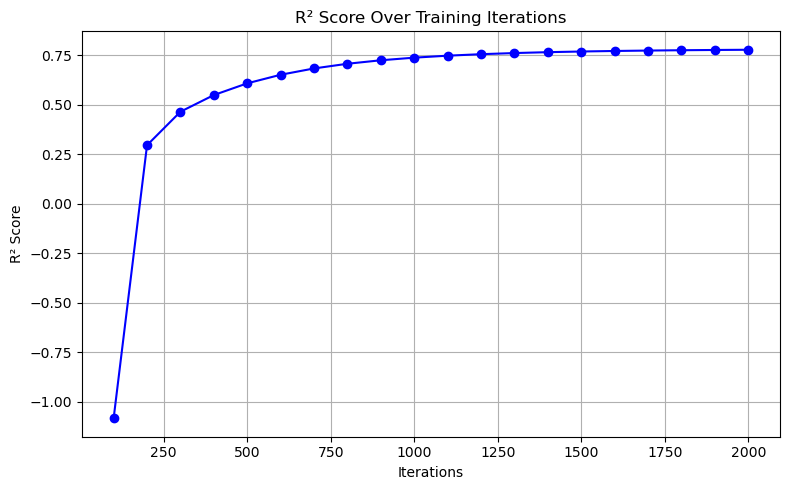

In [8]:
from linear_regression import LinearRegressionNeuron
import numpy as np

print("\nUsing Custom LinearRegressionNeuron with R² Tracking:")

# Set total iterations and tracking interval
total_iters = 2000
interval = 100

# Initialize model
neuron = LinearRegressionNeuron(learning_rate=0.01, n_iters=interval)

# Track R² values
r2_scores = []

for i in range(0, total_iters, interval):
    neuron = LinearRegressionNeuron(learning_rate=0.01, n_iters=i)
    neuron.fit(X_train_processed, y_train)  # Fit for `interval` iterations each time
    y_pred = neuron.predict(X_test_processed)
    r2 = neuron.score(X_test_processed, y_test)
    r2_scores.append((i + interval, r2))
    #print(f"Iteration {i + interval}: R^2 Score = {r2:.4f}")

import matplotlib.pyplot as plt

# Assuming r2_scores is a list of tuples like [(100, r2_1), (200, r2_2), ..., (2000, r2_n)]
iterations, scores = zip(*r2_scores)

plt.figure(figsize=(8, 5))
plt.plot(iterations, scores, marker='o', linestyle='-', color='blue')
plt.title('R² Score Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('R² Score')
plt.grid(True)
plt.tight_layout()
plt.show()



As you can see, the $R^2$ value increases exponentially with the number of iterations, converging to the same $R^2$ value as the least unbiased estimator